In [4]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import os
from plot_with_trends import *

event_dir = "events/intrinsic"
event_files = [f for f in os.listdir(event_dir) if f.startswith("events.out.tfevents")]
event_files.sort()  # Sort to ensure order if needed
event_files[-1]

'events.out.tfevents.1747260872.i65.488138.0'

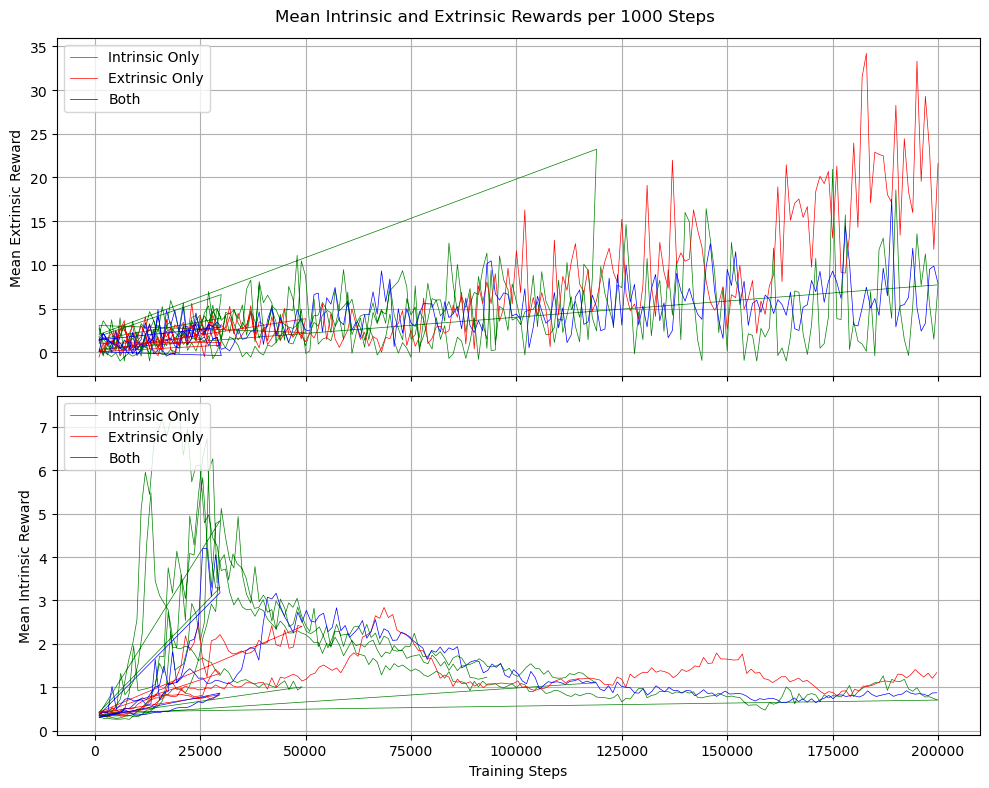

In [3]:
# Make a similar plot with two subplots for the intrinsic and extrinsic rewards, but plot all the events in events/intrinsic in green, all those in events/extrinsic in red, and all those in events/both in blue. The x-axis should be the training steps, and the y-axis should be the mean intrinsic and extrinsic rewards per 1000 steps. The title should be "Mean Intrinsic and Extrinsic Rewards per 1000 Steps". The legend should indicate which color corresponds to which event type.
# Get all event files from each directory
intrinsic_dir = os.path.join('events', 'intrinsic')
extrinsic_dir = os.path.join('events', 'extrinsic') 
both_dir = os.path.join('events', 'both')

# Lists to store data from each directory
intr_steps_list = []
intr_values_list = []
extr_steps_list = []
extr_values_list = []

# Helper function to load data from directory
def load_dir_data(directory):
    intr_steps, intr_values = [], []
    extr_steps, extr_values = [], []
    
    for file in os.listdir(directory):
        if file.startswith('events'):
            ea = event_accumulator.EventAccumulator(os.path.join(directory, file))
            ea.Reload()
            
            # Extract scalar data
            intr_events = ea.Scalars('Mean_intr_reward_per_1000_steps')
            extr_events = ea.Scalars('Mean_extr_reward_per_1000_steps')
            
            # Add to lists
            intr_steps.extend([e.step for e in intr_events])
            intr_values.extend([e.value for e in intr_events])
            extr_steps.extend([e.step for e in extr_events])
            extr_values.extend([e.value for e in extr_events])
            
    return intr_steps, intr_values, extr_steps, extr_values

# Load data from each directory
for directory, color in [(intrinsic_dir, 'green'), (extrinsic_dir, 'red'), (both_dir, 'blue')]:
    if os.path.exists(directory):
        i_steps, i_vals, e_steps, e_vals = load_dir_data(directory)
        intr_steps_list.append((i_steps, i_vals, color))
        extr_steps_list.append((e_steps, e_vals, color))

# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot extrinsic rewards
for steps, values, color in extr_steps_list:
    label = {'red': 'Extrinsic Only', 'blue': 'Both', 'green': 'Intrinsic Only'}[color]
    ax1.plot(steps, values, color=color, label=label, linewidth=0.5)

ax1.set_ylabel('Mean Extrinsic Reward')
ax1.grid(True)
ax1.legend(loc='upper left')

# Plot intrinsic rewards  
for steps, values, color in intr_steps_list:
    label = {'red': 'Extrinsic Only', 'blue': 'Both', 'green': 'Intrinsic Only'}[color]
    ax2.plot(steps, values, color=color, label=label, linewidth=0.5)

ax2.set_xlabel('Training Steps')
ax2.set_ylabel('Mean Intrinsic Reward')
ax2.grid(True)
ax2.legend(loc='upper left')

plt.suptitle('Mean Intrinsic and Extrinsic Rewards per 1000 Steps')
plt.tight_layout()
plt.show()
